# 2s986 Quiz 1, Alban Cobi

## Problem 1

#### a) Workflow Management
My MS research involved fabricating soft axially-symetric cone shaped geometries (suction cups) and  attaching them to substrates via negative pressure (suction) and then separating them from the surface using an instron machine to determine the maximum separation force. In my experiments, varied the surface roughness, the viscosity of the newtonian fluid between the two surfaces and the separation speed. Based on my workflow and goals, I am approaching this as a FORWARD PREDICTION problem. I am trying to determine a functional relationship between the maximum separation force normalized by the area of the suction cup and the parameters that I varied (input parameters).

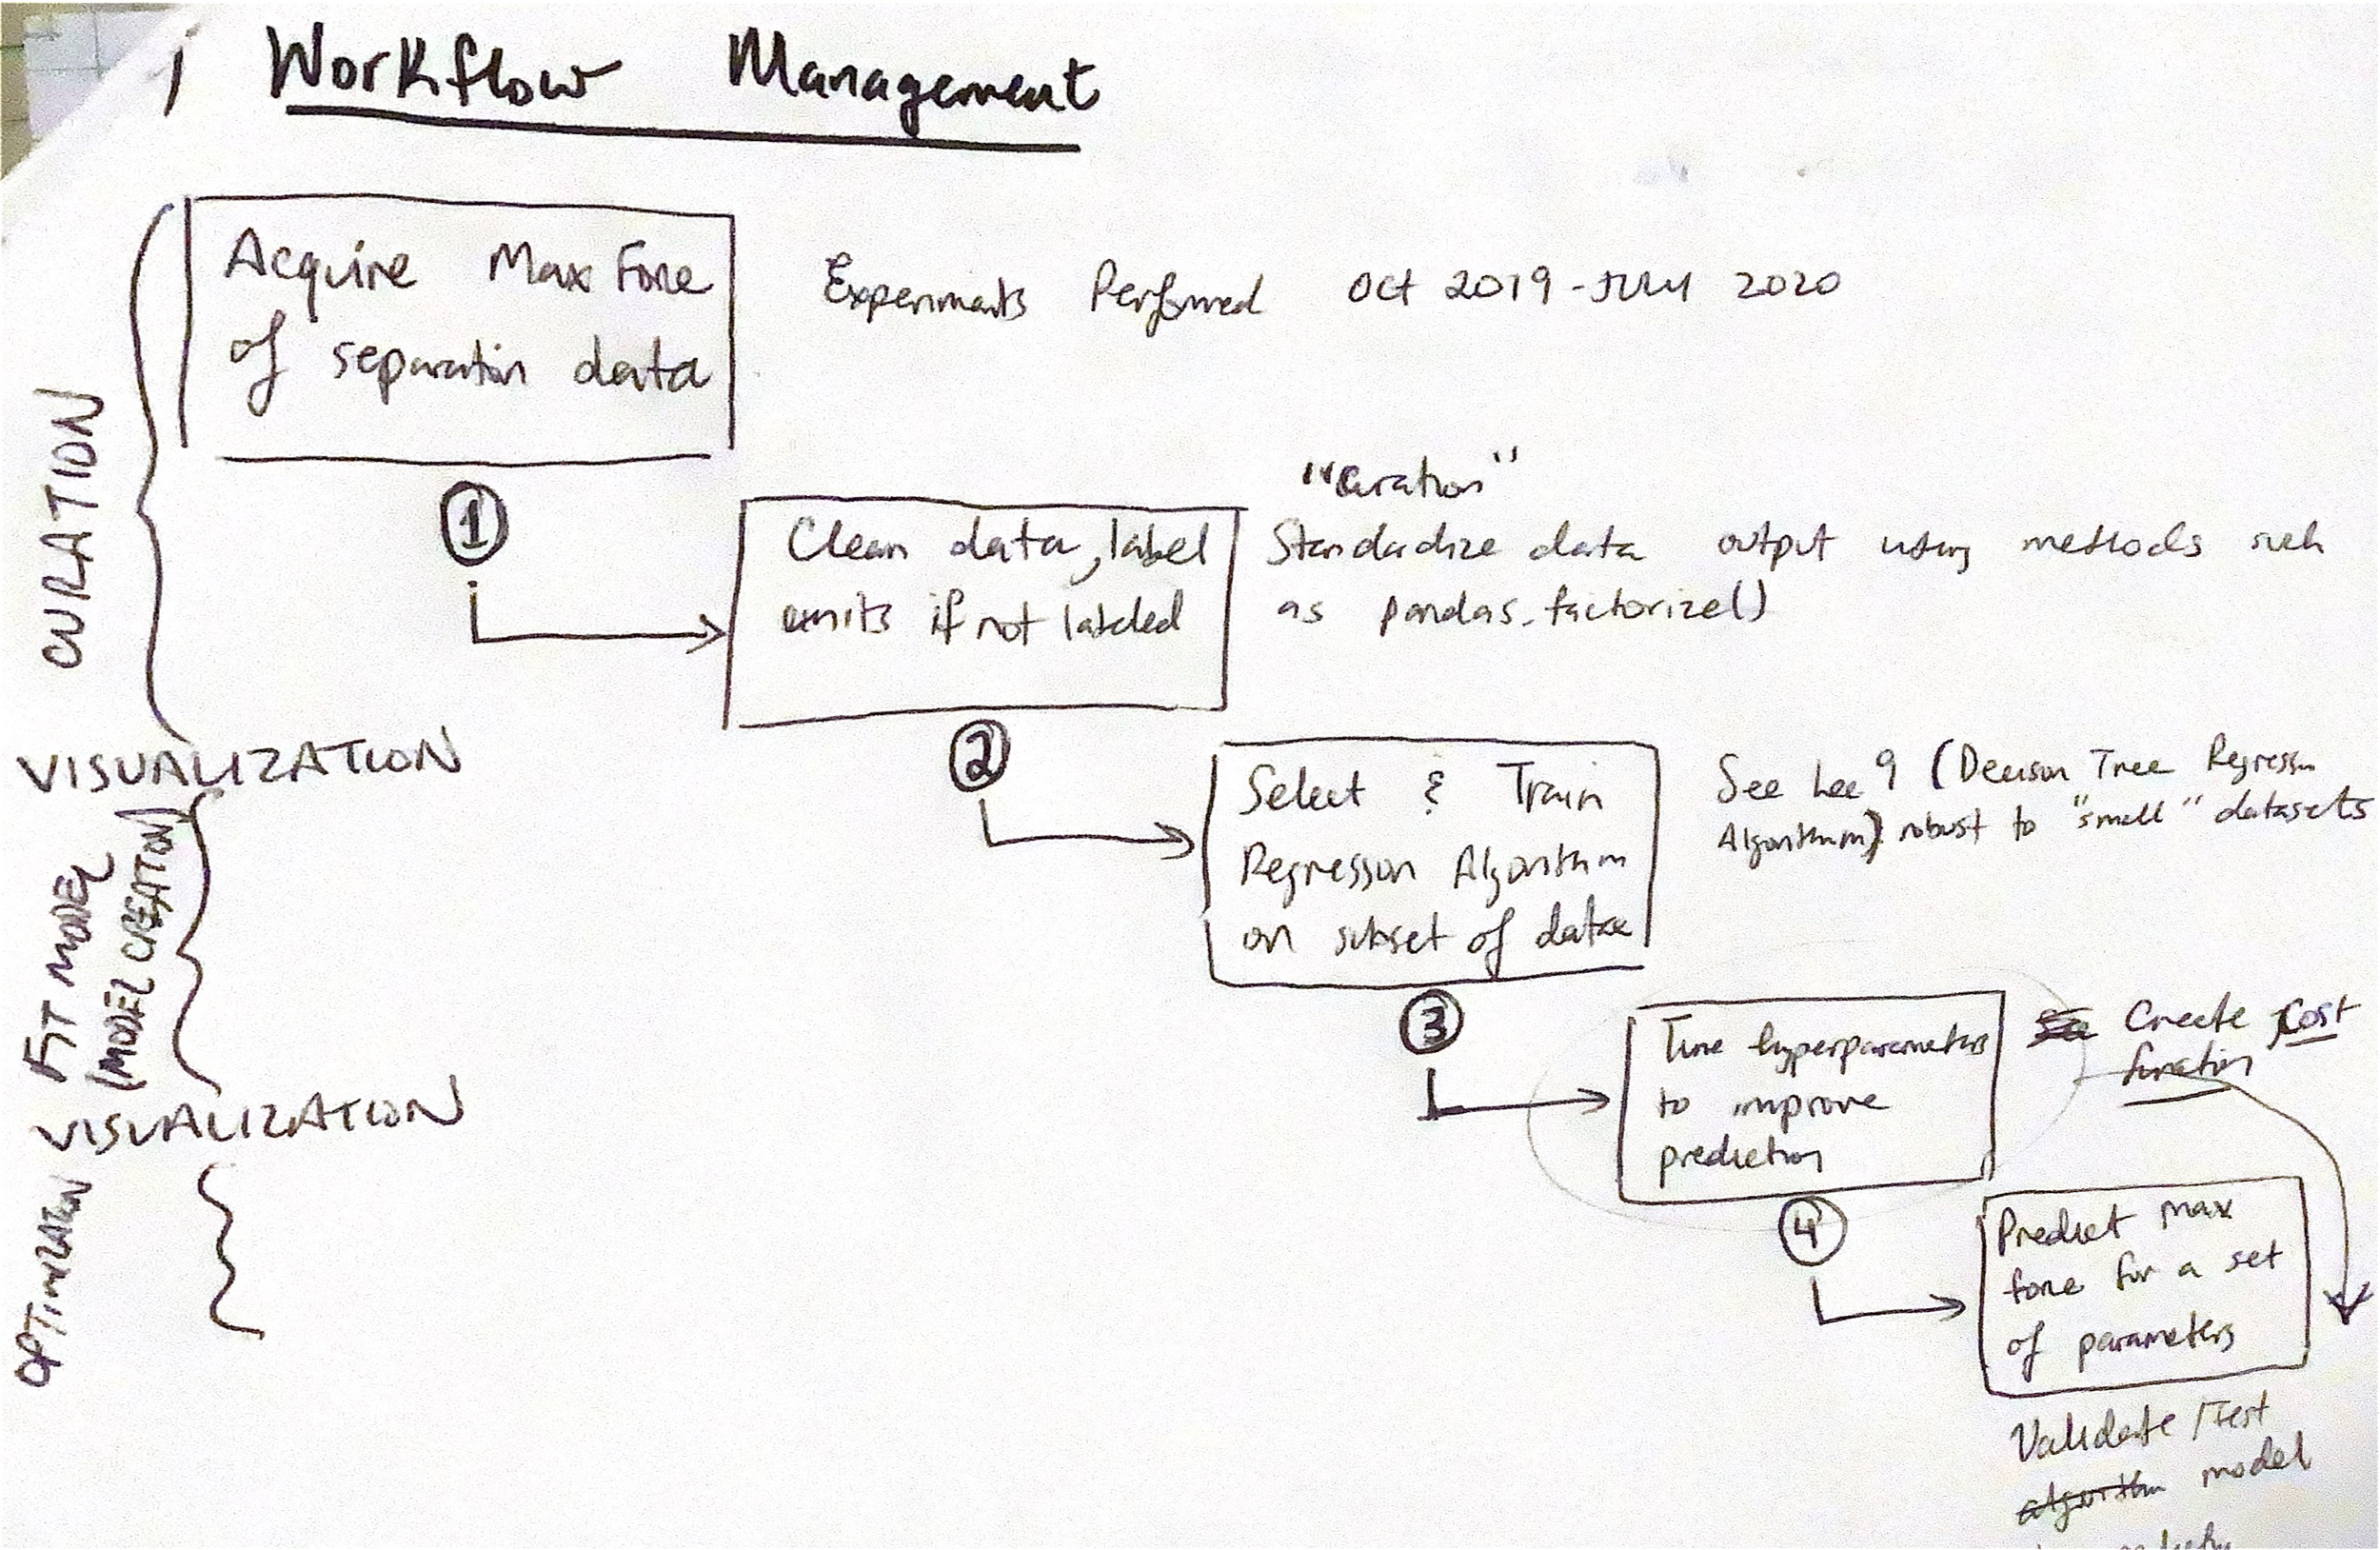

In [1]:
from IPython.display import Image # for importing and displaying images
Image("2s986_quiz_1_workflow.jpg")

#### b) Data Curation (preparation and cleaning)
i) Since my dataset is relatively small (~60 experiments) I manually cleaned up the data before exporting it to the jupyter notebook. In order to get some practice with python and the libraries we've been using, I added two columns of data to my dataset, Experiment Age and Failure Pressure (my output).

ii) I would like to explain here what the data looked like before I cleaned it up and how I would clean it up in python. The data had fluid names - categorical variables (strings) - for viscosity, which I looked up and replaced with the numerical viscosity of the fluid. It had the same for substrate roughness. If I were to clean up the data in python I would find the categorical variables and replace them with the numerical value to convert everything to machine-readable format. Given my small dataset, If I had a few missing/incomplete data points I may just scrub them but if there were many missing data points I would probably do more experiments.

In [2]:
comment = '''
import pandas as pd
import os

# create empty DataFrame with columns names
column_names = ["viscosity [Pa-s]", "separation speed [m/s]", \
               "substrate mean roughness [m]","date of experiment", \
                "max separation force"]
df = pd.DataFrame(columns = column_names) # create empty data frame
#print(df)

# count number of experiments
# For all kind of files, subdirectories included:
list = os.listdir("suction cup instron tests/") # dir is your directory path
number_files = len(list)
print(number_files,'subfolders')

#Only files (avoiding subdirectories):
onlyfiles = next(os.walk("suction cup instron tests/"))[2] #dir is your directory path as string
print(len(onlyfiles), 'files in folder')

def list_files(path_to_directory):
    r = []
    for root, dirs, files in os.walk(path_to_directory):
        for name in files:
            r.append(os.path.join(root, name))
    return r
r = list_files("suction cup instron tests/")
print(r)

# export the data to csv file
#df.to_csv('suction_cup_separation_force_data.csv') # exports the data to csv file
'''
import pandas as pd # for working with data sets
import numpy as np # library for numerical (vector/matrix) computing
import math

# store data in data frame object
df = pd.read_csv('suction_cup_instron_tests2.csv')

# add a column to specify "age of experiment"
df.insert(1, "Experiment_Age_[months]",0, True) 
for i in np.arange(len(df)):
    if df.loc[i,'Date'] == 'July-2020':
        df.loc[i,'Experiment_Age_[months]'] = 3
    elif df.loc[i,'Date'] == 'Oct-2019':
        df.loc[i,'Experiment_Age_[months]'] = 12
        
# delete 'Date' column as it's not needed for data analysis
#df.drop(columns=['Date'],axis=1)
#df.drop('Date',axis=1)

# add output column Failure_Pressure = Max_force/(pi/4)*Outer_diameter^2
df.insert(len(df.columns),"Failure_Pressure_[Pa]",0, True)
area_df = pd.DataFrame()
for i in np.arange(len(df)):
    area_df.loc[i,1] = math.pi*(df.loc[i,'Outer_diameter_[m]'])*(df.loc[i,'Outer_diameter_[m]'])/4
    df.loc[i,'Failure_Pressure_[Pa]'] = df.loc[i,'Max_force_[N]']/area_df.loc[i,1]
    #df.loc[i,'Failure_Pressure_[Pa]'] = df.loc[i,'Max_force_[N]']*4

df

,Date,Experiment_Age_[months],Viscosity_[Pa-s],Separation_speed_[m/s],Substrate_roughness_[m],Outer_diameter_[m],Max_force_[N],Failure_Pressure_[Pa]
0,July-2020,3,0.00089,0.000010,0.000005,0.05,30.7,15635.381609
1,July-2020,3,0.00089,0.010000,0.000005,0.05,58.3,29691.946183
2,July-2020,3,0.00089,0.010000,0.000005,0.05,57.9,29488.227856
3,July-2020,3,0.00089,0.001000,0.000005,0.05,55.3,28164.058730
4,July-2020,3,0.00089,0.001000,0.000005,0.05,55.1,28062.199566
...,...,...,...,...,...,...,...,...
58,Oct-2019,12,0.00089,0.001667,0.000005,0.05,52.2,26585.241694
59,Oct-2019,12,0.00089,0.001667,0.000005,0.05,52.5,26738.030439
60,Oct-2019,12,0.00089,0.000167,0.000005,0.05,48.4,24649.917586
61,Oct-2019,12,0.00089,0.000167,0.000005,0.05,47.1,23987.833023


#### c) Data Visualization
I had a difficult time (probably due to my lack of python skills) in plotting the data to get meaningful results, but I've plotted some of it in MATLAB and know that my output (Failure Pressure) is a non-linear function of my inputs. Therefore, a simple scatter plot is not the best way to see the marginal dependance of the output on each input. I pulled this code from the Concrete Data set we've been practicing and applied it to my data just to get some practice. If I were to make better plots I would plot the marginal dependence on each input while keeping the other inputs constant - this also agrees with how I performed my experiments. For example, to see the effect of viscosity on failure pressure I kept the substrate and separation speed constant while I swept through 6 different viscosities to isolate it's dependance.

The color is for variable Experiment_Age_[months] with red as the oldest and blue as the most recent.


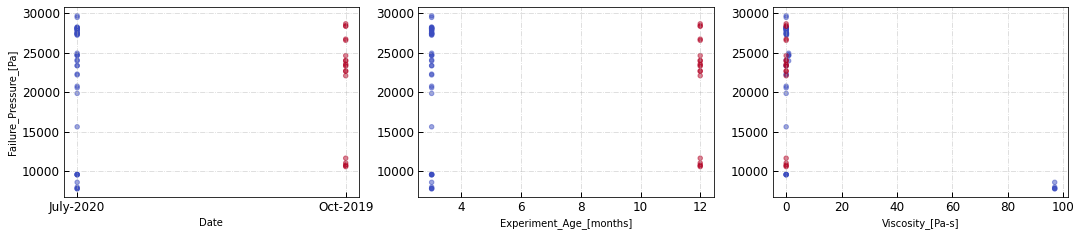

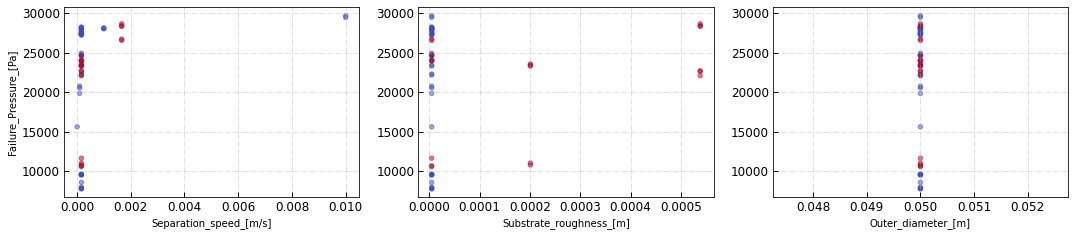

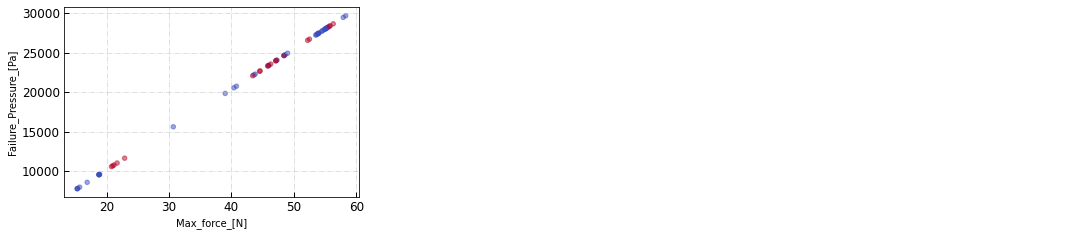

'\n# Detailed pearson linear correlation plot\ncorr = df.corr(method=\'pearson\')#\'spearman\'\ndf_cols = corr.columns\ndf_len = len(df_cols)\n\nfig, ax=plt.subplots(figsize=(df_len,df_len))\nsns.set(font_scale=1.5)\nsns.set_style("ticks",{\'xtick.direction\': \'in\', # set the style of the plot using seaborn\n                       \'ytick.direction\':\'in\',\n                       \'xtick.top\': False,\'ytick.right\': False})\nmask = np.triu(np.ones_like(corr, dtype=np.bool))\ncmap = plt.get_cmap(\'coolwarm\')\nsns.heatmap(corr, mask = None, cbar_kws={"shrink": .2}, annot=True, fmt=\'.2f\', \n            cmap=cmap, cbar=False, ax=ax, square=True)\nax.set_xlim(0, df_len)\nax.set_ylim(df_len, 0)\nax.set_title("Pearson Coefficients for Linear Correlation", fontsize = 20)\nplt.xticks(rotation=75)\nplt.yticks(rotation=0) \nplt.show()\n'

In [3]:
import matplotlib.pyplot as plt # library for MATLAB way of creating plots
import seaborn as sns # library for making statistical graphics
                      # builds on top of matplotlib and integrates closely with pandas data structures
    
# Define function/method to create scatter plot of preditions vs. groung truth (taken from week 3 data_visual_cement_dataset.ipynb)
from sklearn.metrics import mean_squared_error
def plot_predictions(y, y_hat, labels):
 
  
    plt.rcParams.update({'font.size': 15})
    y, y_hat, labels = list(
        map(
            lambda l: l if isinstance(l, list) else [l],
            [y, y_hat, labels]))
    color_list = ['blue', 'red']
    n_plots = len(y)
    y_min = min([min(z) for z in y])
    y_max = max([max(z) for z in y])
    lims = (y_min, y_max)
    fig, ax = plt.subplots(
        1, n_plots, figsize=(7*n_plots, 6),
        squeeze=False, sharex=True, sharey=True)
    for axis, target, prediction, label, color in zip(ax[0, :], y, y_hat, labels, color_list):
        # Scatter plot
        axis.scatter(target, prediction, alpha=0.3, c = color)

        # Title and labels
        rmse_value = np.sqrt(mean_squared_error(target, prediction))
        title = label + "  (RMSE=%.3f)" % rmse_value
        axis.set_title(title)
        axis.set_xlabel('Target Failure Pressure (Pa)')
        axis.set_ylabel('Predicted Failure Pressure (Pa)')
        axis.plot(lims, lims, 'k--', alpha=0.75, zorder=0)
        axis.yaxis.set_tick_params(which='both', labelleft=True)

    plt.subplots_adjust(wspace = 0.3)
    plt.show()
    
# Visualize the marginalized dependence as scatter plot (taken from week 3 data_visual_cement_dataset.ipynb)
n_col = 3 # num of columns per row in the figure
y_indx = -1 # Max_force_[N] # Choose which column is the response variable 
color_indx = 1 #Age [days] # Choose which column is shown as the superimposed color
column_names = df.columns.values

cmap = plt.get_cmap('coolwarm', 10)
print("The color is for variable", column_names[color_indx], "with red as the oldest and blue as the most recent.")

for n in np.arange(0, 8, n_col):
        fig,axes = plt.subplots(1, n_col, figsize=(18, 3.5), sharey = False)
        for i in np.arange(n_col):
            #print(n)
            if n< len(column_names)-1:
                im = axes[i].scatter(df.iloc[:,n],df.iloc[:,y_indx], 
                                     c=df.iloc[:,color_indx], s = 20, cmap=cmap, alpha =0.5, edgecolors = 'face')
                axes[i].set_xlabel(column_names[n])
            else:
                axes[i].axis("off")
                #axes[i].set_title(sf_cols[n])
            n = n+1      
        axes[0].set_ylabel(column_names[y_indx])
        for i in range(len(axes)):
            axes[i].tick_params(direction='in', length=5, width=1, labelsize = 12, grid_alpha = 0.5)
            axes[i].grid(True, linestyle='-.')
        plt.show()
        
# See correlation between input variables using Pearson correlation coefficient 
#(taken from week 3 data_visual_cement_dataset.ipynb)
# Quick correlation plot
#df.corr(method='spearman').round(2)
#sns.heatmap(df.corr(method='spearman'))

# Pearson correlation doesn't make sense here because the relationship between the output and inputs of interest is non-linaer.
'''
# Detailed pearson linear correlation plot
corr = df.corr(method='pearson')#'spearman'
df_cols = corr.columns
df_len = len(df_cols)

fig, ax=plt.subplots(figsize=(df_len,df_len))
sns.set(font_scale=1.5)
sns.set_style("ticks",{'xtick.direction': 'in', # set the style of the plot using seaborn
                       'ytick.direction':'in',
                       'xtick.top': False,'ytick.right': False})
mask = np.triu(np.ones_like(corr, dtype=np.bool))
cmap = plt.get_cmap('coolwarm')
sns.heatmap(corr, mask = None, cbar_kws={"shrink": .2}, annot=True, fmt='.2f', 
            cmap=cmap, cbar=False, ax=ax, square=True)
ax.set_xlim(0, df_len)
ax.set_ylim(df_len, 0)
ax.set_title("Pearson Coefficients for Linear Correlation", fontsize = 20)
plt.xticks(rotation=75)
plt.yticks(rotation=0) 
plt.show()
'''

#### d) Algorithm Selection & Comparison (Model Fitting)
Since I know my output has a non-linear dependance on the inputs, I predict that a linear regression model would not be the best fit but I go through different methods here to see the improvement. I predict that a Decision Tree Regression fit might work well on my data since it's a relatively small data set.

Output: Failure Pressure
Inputs: Viscosity, Separation Speed, Substrate Roughness

I chose the input and output variables based on the physics of the problem. I have performed analysis and based on intuition gained from experiments, I know that the following inputs have an effect on the output. In many attachment/adhesion applications, maximum failure pressure is the desired feature of an adhesive pad so this is why it is my output variable.

I fit 3 different models here, improving on the Cost Function (RMSE) each time: \
Linear Regression Fit \
Polynomial Regression Fit \
Decision Tree Regression Fit 

In [4]:
from sklearn.model_selection import train_test_split # for splitting data

# split data into training set and testing set (taken from week 3 data_visual_cement_dataset.ipynb)
X = df.iloc[:,[2,3,4]]
y = df.iloc[:,-1]

#print(X)
#print(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2 )

print('The complete dataset has: %d samples' % (len(df)))
print('The test dataset has: %d samples' % (len(X_test)))
print('The train dataset has: %d samples' % (len(X_train)))

The complete dataset has: 63 samples
The test dataset has: 13 samples
The train dataset has: 50 samples


#### Linear Regression Fit

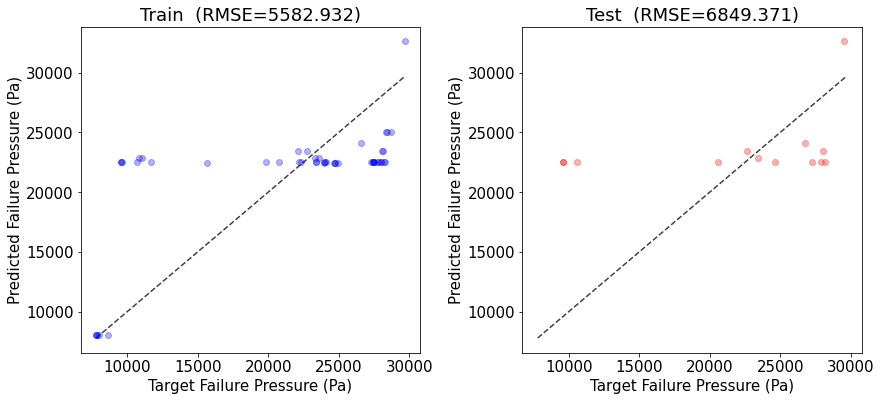

In [5]:
# Fit standard linear regression model even though data doesn't seem to be linearly related
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_hat_train = regressor.predict(X_train)  # Training set predictions
y_hat_test = regressor.predict(X_test)  # Test set predictions

# Plot linear regression model vs. ground truth
plot_predictions([y_train, y_test], [y_hat_train, y_hat_test],    labels=['Train', 'Test'])

#### Polynomial Regression Fit
The polynomial regression fit of 4-5th order seems to have the best fit and not a big difference in RMSE between the train and test data.

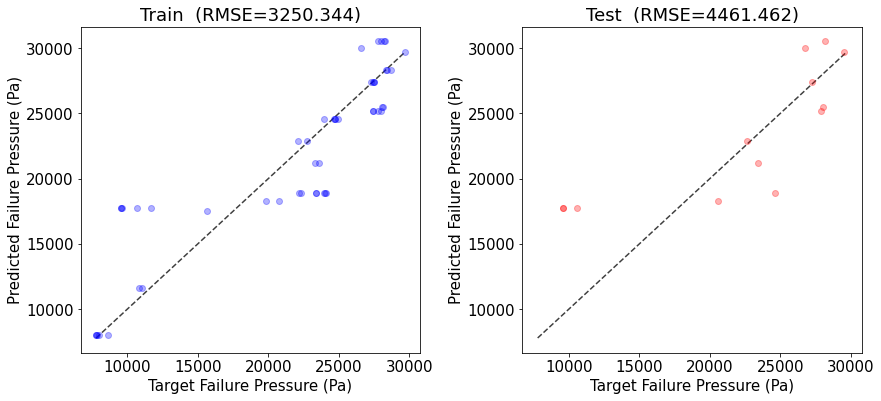

In [6]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

degree=4
regressor=make_pipeline(PolynomialFeatures(degree),LinearRegression())
regressor.fit(X,y)

regressor.fit(X_train, y_train)

y_hat_train = regressor.predict(X_train)  # Training set predictions
y_hat_test = regressor.predict(X_test)  # Test set predictions

plot_predictions([y_train, y_test], [y_hat_train, y_hat_test],    labels=['Train', 'Test'])

#### Decision Tree Regression Fit
The decision tree regression fit seems to do much better than the polynomial regression but I am not quite sure if I am overfitting my data. I chose a depth size of 5 because it seems liek the train and test data RMSE are close.

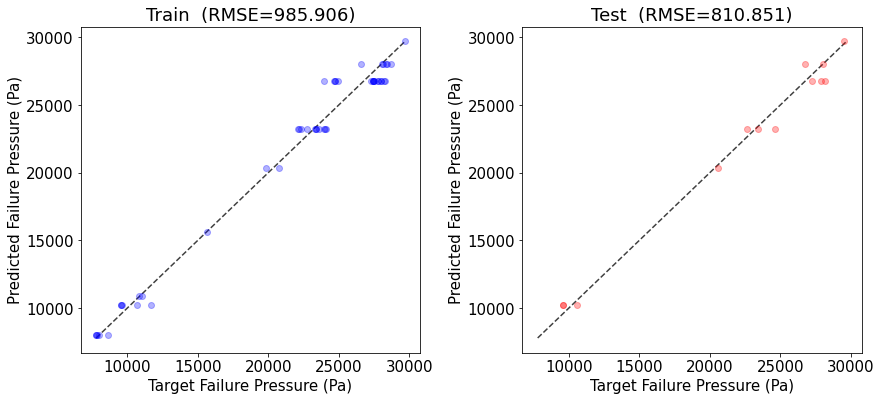

In [7]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

tree_reg = DecisionTreeRegressor(max_depth=5)

tree_reg.fit(X_train, y_train)
y_hat_train = tree_reg.predict(X_train)  # Training set predictions
y_hat_test = tree_reg.predict(X_test)  # Test set predictions

plot_predictions([y_train, y_test], [y_hat_train, y_hat_test],    labels=['Train', 'Test'])

I think the Decision Tree Regression Fit is the best fit for my data even though it seems like the RMSE is high. In reality the RMSE is under 10 percent of the predicted value so that is good enough. I will also try a Gradient Boosting Regression with Decision Trees to see if it performed better than just Decision Tree.

#### Gradient Boosting Regression (with Decision Tree) Fit

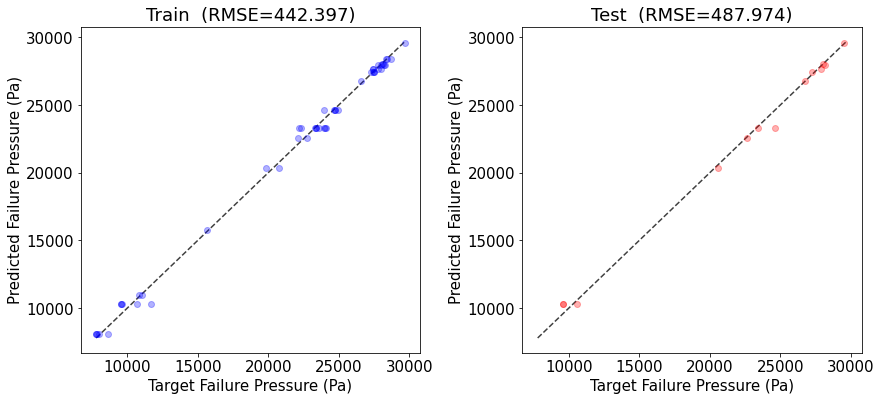

In [8]:
# Code taken from Week 5 - Demo_Regression_Model_Training.ipynb
# first scale data
from sklearn.preprocessing import MinMaxScaler
# Scale inputs
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# then fit model
from sklearn.ensemble import GradientBoostingRegressor

regressor = GradientBoostingRegressor(max_depth=5, n_estimators = 50)
regressor.fit(X_train_scaled, y_train)

y_hat_train = regressor.predict(X_train_scaled)
y_hat_test = regressor.predict(X_test_scaled)

plot_predictions([y_train, y_test], [y_hat_train, y_hat_test],    labels=['Train', 'Test'])

#### Random Search Fit with Cross Validation (aKa Hyper Parameter Tuning)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   50.0s finished


Best params: 
 {'learning_rate': 0.1, 'max_depth': 2, 'min_samples_split': 3, 'n_estimators': 134}


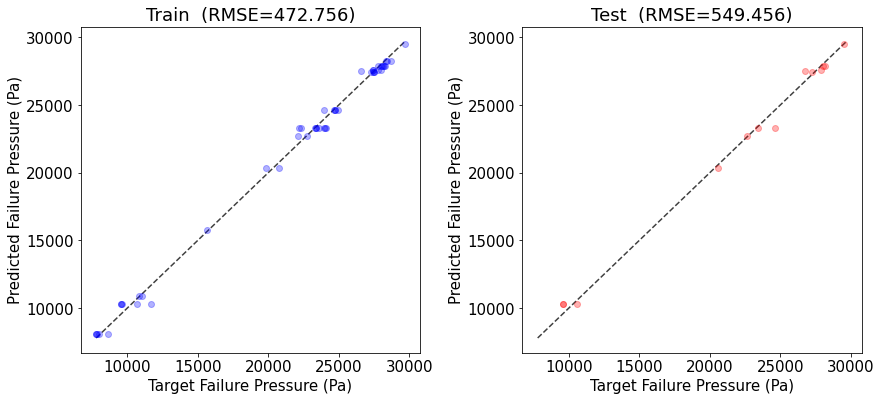

In [9]:
# Code taken from Week 5 - Demo_Regression_Model_Training.ipynb
from scipy import stats 
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {
    'n_estimators': stats.randint(low=10, high=1000),
    'max_depth': stats.randint(low=2, high=6),
    'min_samples_split': stats.randint(low=2, high=5),
    'learning_rate': [1, 0.5, 0.25, 0.1, 0.05, 0.01]
}


regressor_cv = RandomizedSearchCV(
    regressor, param_distributions=param_distributions,
    n_iter=100, verbose=1)
regressor_cv.fit(X_train_scaled, y_train)

print('Best params: \n', regressor_cv.best_params_)

y_hat_train = regressor_cv.predict(X_train_scaled)
y_hat_test = regressor_cv.predict(X_test_scaled)
plot_predictions([y_train, y_test], [y_hat_train, y_hat_test],    labels=['Train', 'Test'])

## Problem 2

#### a) Workflow Management
For my research challenge I am not fully decided yet because I just started a new PhD project but I am considering the following from my PhD work:

I am trying to come up with a thermodynamic model of the reaction between activated aluminum fuel and water in a closed-vessel. Activated aluminum reacts with water to produce hydrogen, aluminum byproducts such as aluminum oxyhydroxide and heat. The hydrogen can be used as a high pressure energy source able to do work and heat can be used as a thermal energy source that can potentially be stored or used in a separate cycle. 

Goal 1: In some applications, the highest pressure possible is required out of the aluminum reaction, with minimal water and alumimim used. This is an optimization problem, whereby an accurate thermodynamics model can predict the minimum amount of water and aluminum needed to achieve certain pressures and temperatures.

Goal 2: In other applications, the thermal energy released by the reaction may be stored in a phase change material to be recovered later. Adding in another reaction species complicates the thermodynamic model. In this case the goal would be to optimize the reaction to produce certain temperatures (and potentially pressures) so that you can operate the reactor in a certain operation point. This may be treated as a forward prediction, optimization problem, or inverse design problem.

I think the optimization problem may be the easiest to tackle given my lack of data:

Acquire data -> Clean & curate -> Select and train fit -> optimize -> tune hyperparameters of fit

#### b) Data Curation (preparation and cleaning)
I have some initial data based on some experiments I and a labmate of mine have done. We also have an initial model but the model is not accurate for all regimes of operation. I would start with the data we already have (~10 datapoints) and gather more data from here. I am just worried that I may not be able to collect enough data to finish this final research project on time.

Since this is cutting edge research, there is no clean data out there on the exact experiment I am trying to perform so if I can not acquire the data myself I may be stuck.

#### c) Data Visualization
I think the data visualization tools we have been using so far in this class will suffice for this. Since it's thermodynamic data for known reaction species it is not very high dimensional data. Tools such as pandas, numpy and matplotlib may suffice.

#### d) Algorithm Selection & Comparison (Model Fitting)
As stated above in part (a) I have two goals that may be posed as:

Optimization Problem - Choose minimum amount of reactants to produce maximum pressure inside pressure vessel.

Forward Prediction Problem - Determine the relationship between Pressure, Temperature as a function of time and amounts of reactants placed in reaction chamber.

Inverse Design Problem - Given an operating point (Temperature & Pressure or any other two thermodynamic states), determine a combination of aluminum, water, and phase change material that will achieve that operating point.

Given that I have very small data sets so far, I predict that the optimization problem might be the most tangible to tackle.

#### e) Define the Gap
Given that I just started the project, I may be limited by my domain expertise more than anything, so I am not quite sure what other ML-based tools I will need.